In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

# To Do
1. Consider saving output to NetCDF

# Function to retrieve grid specs

In [51]:
def return_grid_specs(path):
    
    df = pd.read_csv(path)
    col_name = df.columns[0]
    ncols_line = df.columns[0]
    nrows_line = df[col_name][0]
    xmin_line = df[col_name][1]
    ymin_line = df[col_name][2]
    size_line = df[col_name][3]

    x_n = int(ncols_line.split()[-1])
    y_n = int(nrows_line.split()[-1])
    x_min = int(float(xmin_line.split()[-1]))
    y_min = int(float(ymin_line.split()[-1]))
    cell_size = int(float(size_line.split()[-1]))

    x = np.arange(x_min, x_min + cell_size * x_n, cell_size) / 1000
    y = np.arange(y_min, y_min + cell_size * y_n, cell_size) / 1000

    return x, y

# Get data

In [52]:
# Load arrays
timestamp = "198001010100"
wn_in_path = "/scratch/summit/erke2265/windninja/PIG/" + timestamp + "/input/" + timestamp + "_vel.asc"
wn_out_path = "/scratch/summit/erke2265/windninja/PIG/" + timestamp + "/output/PIG_1000m_vel.asc"
wn_processed_path = "/scratch/summit/erke2265/windninja/PIG/processed_output/" + timestamp + "00_VW.asc"

wn_in = np.flipud(np.loadtxt(wn_in_path, skiprows=6))
wn_out = np.flipud(np.loadtxt(wn_out_path, skiprows=6))
wn_processed = np.flipud(np.loadtxt(wn_processed_path, skiprows=6))

# Return grid specs
x, y = return_grid_specs(wn_in_path)
wn_x, wn_y = return_grid_specs(wn_out_path)
wn_processed_x, wn_processed_y = return_grid_specs(wn_processed_path)

# Find max min
# maxima = np.maximum(wn_in.max(), wn_out.max())
# minima = np.minimum(wn_in.min(), wn_out.min())
maxima = wn_processed.max()
minima = wn_processed.min()
print("Maxima = " + str(maxima))
print("Minima = " + str(minima))

Maxima = 6.230000019073486
Minima = 3.2200000286102295


# MERRA-2

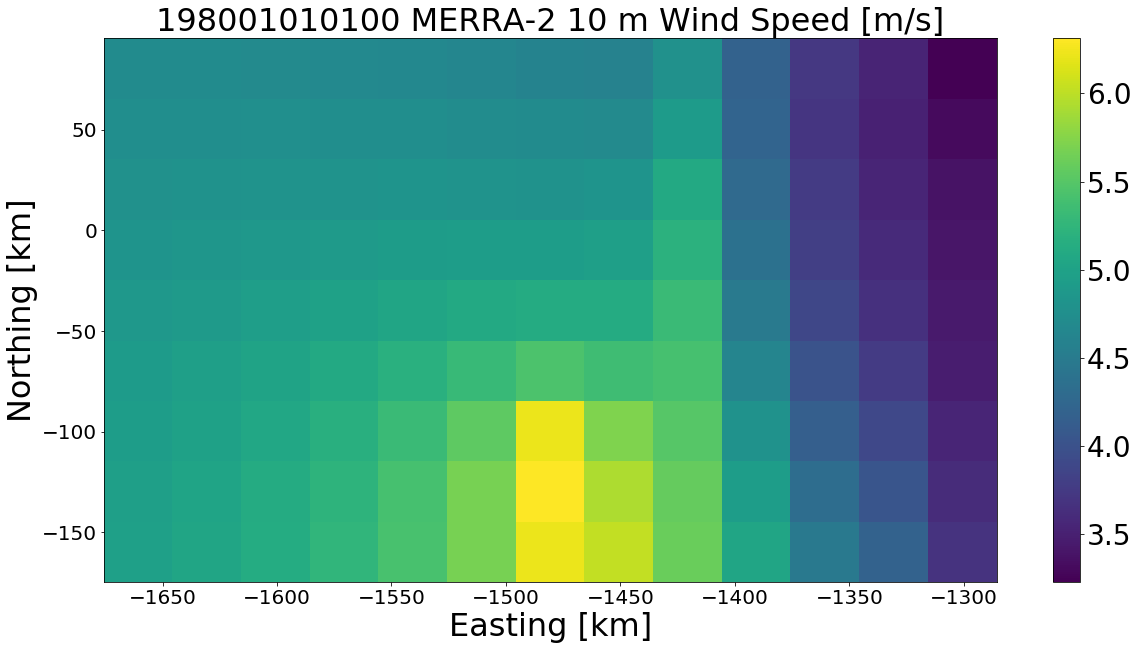

In [53]:
plt.figure(figsize=(20, 10))
# plt.pcolor(x, y, wn_in, vmin=minima, vmax=maxima)
plt.pcolor(x, y, wn_in)
cb = plt.colorbar()
# plt.xlim([wn_x.min(), wn_x.max()])
# plt.ylim([wn_y.min(), wn_y.max()])
cb.ax.tick_params(labelsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Easting [km]", fontsize=32)
plt.ylabel("Northing [km]", fontsize=32)
plt.title(timestamp + " MERRA-2 10 m Wind Speed [m/s]", fontsize=32)
plt.savefig("figures/M2_wind_speed.pdf", dpi=100)
plt.savefig("figures/M2_wind_speed.png", dpi=100)

# WindNinja output

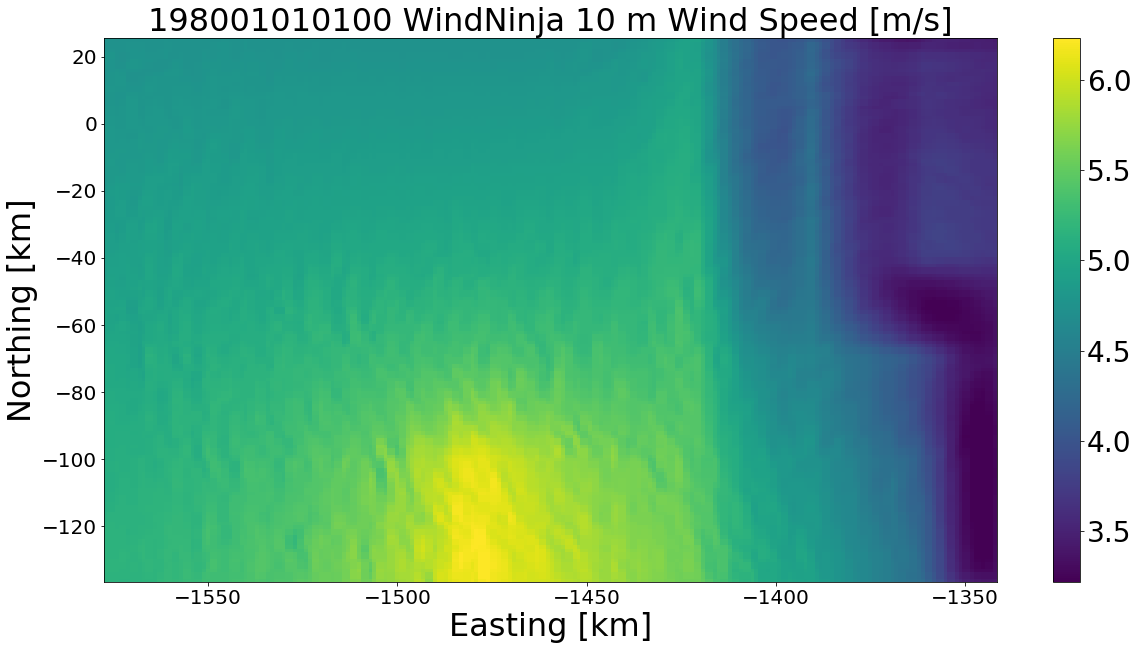

In [54]:
plt.figure(figsize=(20, 10))
plt.pcolor(wn_x, wn_y, wn_out, vmin=minima, vmax=maxima)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=28)
plt.xlim([wn_x.min(), wn_x.max()])
plt.ylim([wn_y.min(), wn_y.max()])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Easting [km]", fontsize=32)
plt.ylabel("Northing [km]", fontsize=32)
plt.title(timestamp + " WindNinja 10 m Wind Speed [m/s]", fontsize=32)
plt.savefig("figures/WN_wind_speed.pdf", dpi=100)
plt.savefig("figures/WN_wind_speed.png", dpi=100)


In [55]:
(wn_x.max() - wn_x.min())

236.0

# Processed WindNinja

Text(0.5, 1.0, '-103.5')

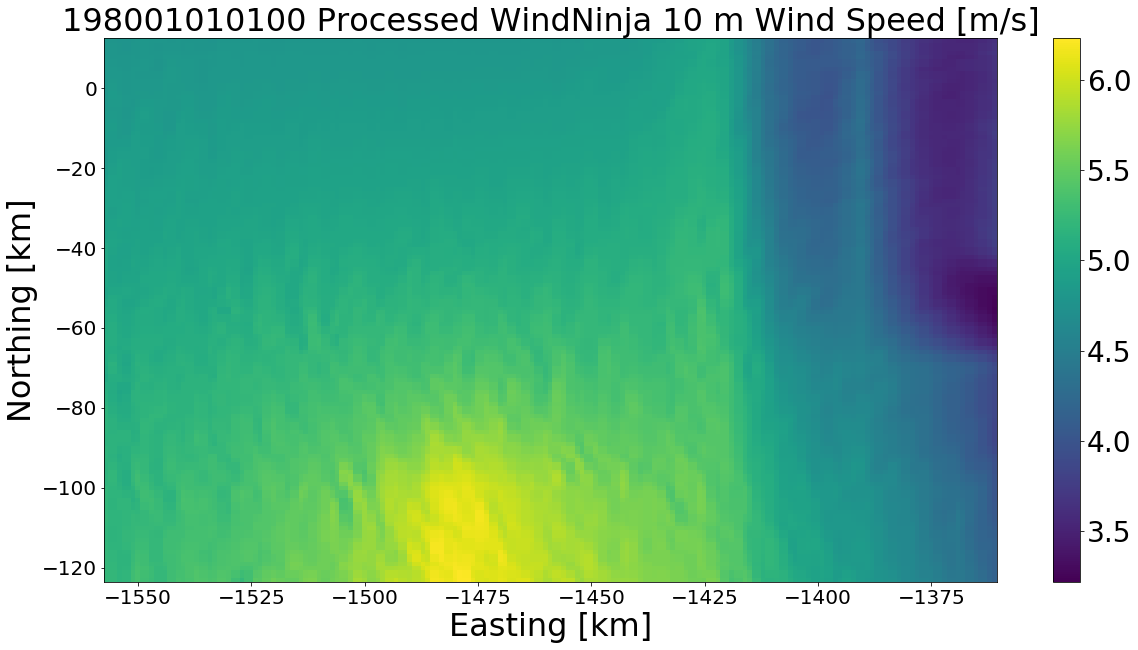

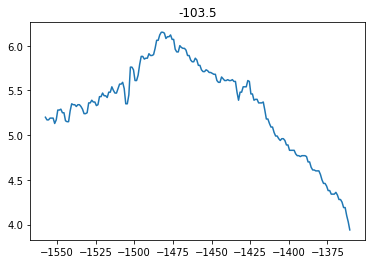

In [56]:
plt.figure(figsize=(20, 10))
plt.pcolor(wn_processed_x, wn_processed_y, wn_processed, vmin=minima, vmax=maxima)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=28)
plt.xlim([wn_processed_x.min(), wn_processed_x.max()])
plt.ylim([wn_processed_y.min(), wn_processed_y.max()])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Easting [km]", fontsize=32)
plt.ylabel("Northing [km]", fontsize=32)
plt.title(timestamp + " Processed WindNinja 10 m Wind Speed [m/s]", fontsize=32)
plt.savefig("figures/Processed_WN_wind_speed.pdf", dpi=100)
plt.savefig("figures/Processed_WN_wind_speed.png", dpi=100)

row_ind = 20
plt.figure()
plt.plot(wn_processed_x, wn_processed[row_ind, :])
plt.title(wn_processed_y[row_ind])

# Determine what the WindNinja simulation bounds should be from the Alpine-3D bounds

In [57]:
# A3D bounds
ulx = -1557000
uly = 13000
lrx = -1359000
lry = -124000

# A3D dimensions
width = lrx - ulx
height = uly - lry
print("Width = " + str(width))
print("Height = " + str(height))

# Calculate WindNinja bounds
wn_ulx = int(ulx - 0.1 * width)
wn_uly = int(uly + 0.1 * height)
wn_lrx = int(lrx + 0.1 * width)
wn_lry = int(lry - 0.1 * height)

Width = 198000
Height = 137000


In [58]:
wn_lry

-137700